# Курсовая работа № 2
## Отчет для hr-отдела

## Оглавление
1. [Динамика количества работников, увольнений и текучести кадров](#Динамика-количества-работников,-увольнений-и-текучести-кадров)
2. [Численность работников по департаментам в 2016 г.](#Численность-работников-по-департаментам-в-2016-г.)
3. [Размер средней ставки заработной платы по департаментам](#Размер-средней-ставки-заработной-платы-по-департаментам)
4. [Анализ увольнений по департаментам](#Анализ-увольнений-по-департаментам)
5. [Текучесть кадров по департаментам](#Текучесть-кадров-по-департаментам)
6. [Причины увольнений в производственном подразделении в 2016 г.](#Причины-увольнений-в-производственном-подразделении-в-2016-г.)
7. [Средний возраст и стаж работников компании](#Средний-возраст-и-стаж-работников-компании)
8. [Производительность сотрудников компании](#Производительность-сотрудников-компании)
9. [Гипотезы 1 и 2. Между средним возрастом сотрудников и производительностью, средним стажем и производительностью есть взаимосвязь](#Гипотезы-1-и-2.-Между-средним-возрастом-сотрудников-и-производительностью,-средним-стажем-и-производительностью-есть-взаимосвязь.)
10. [Гипотеза 3. Производительность работника зависит от менеджера, под началом которого он работает](#Гипотеза-3.-Производительность-работника-зависит-от-менеджера,-под-началом-которого-он-работает)
11. [Гипотеза 4. Подбор сотрудников с определенных источников рабочей силы более эффективен](#Гипотеза-4.-Подбор-сотрудников-с-определенных-источников-рабочей-силы-более-эффективен)

In [348]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

In [415]:
import psycopg2
import pandas as pd
pg_connection = {
    "host":"dsstudents.skillbox.ru",
    "port":"5432",
    "dbname":"human_resources",
    "user":"readonly",
    "password":"6hajV34RTQfmxhS"    
}

conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

#загрузим таблицу в датафрейм

df_hr_dataset = pd.read_sql_query("SELECT * FROM hr_dataset;", conn)

conn.commit()


In [362]:
df_hr_dataset.head()

,id,Employee Name,Employee Number,marriedid,maritalstatusid,genderid,empstatus_id,deptid,perf_scoreid,age,...,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,department,position,Manager Name,Employee Source,Performance Score
0,1,"Brown, Mia",1103024456,1,1,0,1,1,3,30,...,2008-10-27,3317,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,2,"LaRotonda, William",1106026572,0,2,1,1,1,3,34,...,2014-01-06,1420,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,3,"Steans, Tyrone",1302053333,0,0,1,1,1,3,31,...,2014-09-29,1154,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,4,"Howard, Estelle",1211050782,1,1,0,1,1,9,32,...,2015-02-16,58,2015-04-15,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,5,"Singh, Nan",1307059817,0,0,0,1,1,9,30,...,2015-05-01,940,None,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [54]:
#загрузим вторую таблицу в датафрейм
df_production_staff = pd.read_sql_query("SELECT * FROM production_staff LIMIT 5;", conn)
df_production_staff.head()

,id,Employee Name,Race Desc,Date of Hire,TermDate,Reason for Term,Employment Status,Department,Position,Pay,Manager Name,Performance Score,Abutments/Hour Wk 1,Abutments/Hour Wk 2,Daily Error Rate,90-day Complaints
0,1,"Albert, Michael",White,2011-08-01,None,N/A - still employed,Active,Production,Production Manager,$54.50,Elisa Bramante,Fully Meets,0,0,0,0
1,2,"Bozzi, Charles",Asian,2013-09-30,2014-08-07,retiring,Voluntarily Terminated,Production,Production Manager,$50.50,Elisa Bramante,Fully Meets,0,0,0,0
2,3,"Butler, Webster L",White,2016-01-28,None,N/A - still employed,Active,Production,Production Manager,$55.00,Elisa Bramante,Exceeds,0,0,0,0
3,4,"Dunn, Amy",White,2014-09-18,None,N/A - still employed,Active,Production,Production Manager,$51.00,Elisa Bramante,Fully Meets,0,0,0,0
4,5,"Gray, Elijiah",White,2015-06-02,None,N/A - still employed,Active,Production,Production Manager,$54.00,Elisa Bramante,Fully Meets,0,0,0,0


In [53]:
#загрузим третью таблицу в датафрейм
df_salary_grid = pd.read_sql_query("SELECT * FROM salary_grid LIMIT 5;", conn)
df_salary_grid

,id,Position,Salary Min,Salary Mid,Salary Max,Hourly Min,Hourly Mid,Hourly Max
0,1,Administrative Assistant,30000,40000,50000,14.42,19.23,24.04
1,2,Sr. Administrative Assistant,35000,45000,55000,16.83,21.63,26.44
2,3,Accountant I,42274,51425,62299,20.32,24.72,29.95
3,4,Accountant II,50490,62158,74658,24.27,29.88,35.89
4,5,Sr. Accountant,63264,76988,92454,30.42,37.01,44.45


### Динамика количества работников, увольнений и текучести кадров

In [67]:
#Создадим sql запрос и распечатаем строки таблицы (посчитаем количество нанятых сотрудников за период 2010-2016 гг.)
sql_str = """
        SELECT COUNT(*) AS count_hire,
        DATE_PART('year', "Date of Hire") AS year
        FROM hr_dataset
        WHERE DATE_PART('year', "Date of Hire") > 2009 
        AND DATE_PART('year', "Date of Hire") < 2017
        GROUP BY year
        ORDER BY year;
"""
cursor.execute(sql_str)

for row in cursor:
    print(row)

(9, 2010.0)
(84, 2011.0)
(44, 2012.0)
(44, 2013.0)
(60, 2014.0)
(36, 2015.0)
(14, 2016.0)


In [68]:
#сохраним эти данные в датафрейм
df_numb_of_hire = pd.read_sql_query(sql_str, conn)

In [69]:
# Далее создаем 2 таблицы, объединяем для расчета текучести по годам
sql_str = """
        DROP TABLE numb_of_hire;
"""
cursor.execute(sql_str)

conn.commit()

In [70]:
# создаю таблицу, чтобы заполнить количеством принятых работников по годам
sql_str = """
        CREATE TABLE numb_of_hire(
        year_of_hire Int,
        numb_employees Int);
"""
cursor.execute(sql_str)

conn.commit()

In [71]:
# вставляю в таблицу данные - количество принятых по годам нарастающим итогом
sql_str = """
        INSERT INTO numb_of_hire(year_of_hire, numb_employees)
        SELECT DISTINCT year AS year_of_hire,
        SUM(new_worker) OVER (ORDER BY year RANGE UNBOUNDED PRECEDING) AS numb_employees
        FROM hr_dataset
        ,LATERAL(SELECT DATE_PART('year', "Date of Hire"),
        COUNT(*) OVER (PARTITION BY DATE_PART('year', "Date of Hire"))) AS s1(year, new_worker)
        ORDER BY year_of_hire;
"""

cursor.execute(sql_str)

In [72]:
# удаляем таблицу, если она уже есть
sql_str = """
        DROP TABLE numb_of_terms;
"""
cursor.execute(sql_str)

conn.commit()

In [73]:
# Создаем таблицу с количеством уволившихся по годам
sql_str = """
        CREATE TABLE numb_of_terms(
        year_of_term Int,
        numb_terms Int,
        sum_numb_terms Int);
"""
cursor.execute(sql_str)

conn.commit()

In [74]:
# Заполняем таблицу количеством уволенных работников по годам
sql_str = """
        INSERT INTO numb_of_terms
        SELECT DISTINCT CAST(year AS FLOAT) AS year_of_term,
        COUNT(terms) OVER (PARTITION BY DATE_PART('year', "Date of Termination")) AS numb_terms,
        SUM(terms) OVER (ORDER BY year RANGE UNBOUNDED PRECEDING) AS sum_numb_terms 
        FROM hr_dataset
        ,LATERAL(SELECT DATE_PART('year', hr_dataset."Date of Termination"),
        COUNT(*) OVER (PARTITION BY DATE_PART('year', hr_dataset."Date of Termination"))) AS s1(year, terms)
        WHERE hr_dataset."Date of Termination" IS NOT NULL
        ORDER BY year_of_term;
"""
cursor.execute(sql_str)

conn.commit()

In [75]:
# Объединяем две таблицы и рассчитываем кол-во работников компании по годам, а также текучесть - кол-во уволенных, на кол-во
# работников по годам
sql_str = """
        SELECT numb_of_hire.year_of_hire AS year,
        (numb_of_hire.numb_employees - numb_of_terms.sum_numb_terms) AS active_employees,
        numb_of_terms.numb_terms AS numb_of_terms,
        numb_of_terms.numb_terms * 100.0 / (numb_of_hire.numb_employees - numb_of_terms.sum_numb_terms) AS turnover
        FROM numb_of_hire
        JOIN numb_of_terms ON numb_of_hire.year_of_hire = numb_of_terms.year_of_term;
"""
cursor.execute(sql_str)

for row in cursor:
    print(row)

(2010, 20, 2, Decimal('10.0000000000000000'))
(2011, 90, 14, Decimal('15.5555555555555556'))
(2012, 117, 17, Decimal('14.5299145299145299'))
(2013, 146, 15, Decimal('10.2739726027397260'))
(2014, 192, 14, Decimal('7.2916666666666667'))
(2015, 201, 27, Decimal('13.4328358208955224'))
(2016, 201, 14, Decimal('6.9651741293532338'))


In [76]:
#сохраняем таблицу в датафрейм
df_numb_of_employee_by_year = pd.read_sql_query(sql_str, conn)
df_numb_of_employee_by_year.turnover = df_numb_of_employee_by_year.turnover.apply(lambda x: round(x, 1))
df_numb_of_employee_by_year

,year,active_employees,numb_of_terms,turnover
0,2010,20,2,10.0
1,2011,90,14,15.6
2,2012,117,17,14.5
3,2013,146,15,10.3
4,2014,192,14,7.3
5,2015,201,27,13.4
6,2016,201,14,7.0


Text(0.5, 1.0, 'Динамика текучести кадров\n(2010-2016 гг.)')

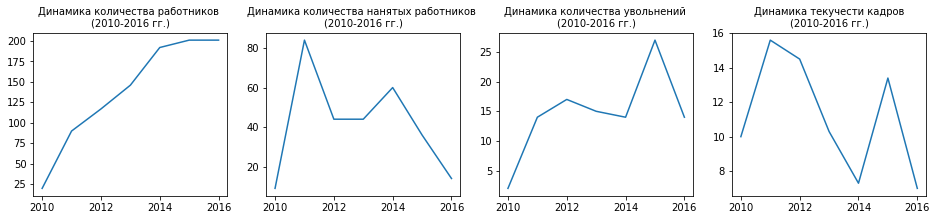

In [77]:
# Распечатаем четыре графика рядом:
fig, (subplot_1, subplot_2, subplot_3, subplot_4) = plt.subplots(
    nrows=1, ncols=4,
    figsize=(16, 3)
)

x_ticks = df_numb_of_employee_by_year.year.values
y_ticks_1 = df_numb_of_employee_by_year.active_employees.values
subplot_1.plot(x_ticks, y_ticks_1)
subplot_1.set_title('Динамика количества работников \n(2010-2016 гг.)', fontsize=10)

x_ticks_2 = df_numb_of_hire.year.values
y_ticks_2 = df_numb_of_hire.count_hire.values
subplot_2.plot(x_ticks_2, y_ticks_2)
subplot_2.set_title('Динамика количества нанятых работников \n(2010-2016 гг.)', fontsize=10)

y_ticks_3 = df_numb_of_employee_by_year.numb_of_terms.values
subplot_3.plot(x_ticks, y_ticks_3)
subplot_3.set_title('Динамика количества увольнений \n(2010-2016 гг.)', fontsize=10)

y_ticks_4 = df_numb_of_employee_by_year.turnover.values
subplot_4.plot(x_ticks, y_ticks_4)
subplot_4.set_title('Динамика текучести кадров\n(2010-2016 гг.)', fontsize=10)

Штат работников компании активно рос вплоть до 2014 года, после чего количество сотрудников фирмы стабилизировалось. При этом, мы видим, что **расширение штата привело к определенным проблемам - количество увольнений постоянно возрастало**, а в 2015 году было зафиксировано рекордное число данного показателя - 27 увольнений. Тем не менее, если мы посмотрим на график текучести персонала, то тренд явно отрицательный, **текучесть кадров снижается**, что является положительным явлением для компании. **В 2016 году текучесть кадров составила 7%, что соответствует ее естественному уровню.**  

### Численность работников по департаментам в 2016 г.

In [82]:
#Создадим sql запрос и распечатаем строки таблицы (число работников в 2016 г. - со статусом 'Active', 
# долю работников департамента в общем штате компании - округлим до десятых)
sql_str = """
        SELECT department, 
        COUNT(*) AS count,
        ROUND(CAST(COUNT(*) * 100. / 
        (SELECT COUNT(*) FROM hr_dataset WHERE "Employment Status" = 'Active') as numeric), 1) AS share
        FROM hr_dataset
        WHERE "Employment Status" = 'Active'
        GROUP BY department
        ORDER BY count;
"""
cursor.execute(sql_str)

for row in cursor:
    print(row)

('Executive Office', 1, Decimal('0.5'))
('Software Engineering', 7, Decimal('3.8'))
('Admin Offices', 8, Decimal('4.4'))
('Sales', 26, Decimal('14.2'))
('IT/IS', 35, Decimal('19.1'))
('Production       ', 106, Decimal('57.9'))


Text(0.5, 1.0, 'Доля отделов в общей \n численности сотрудников компании')

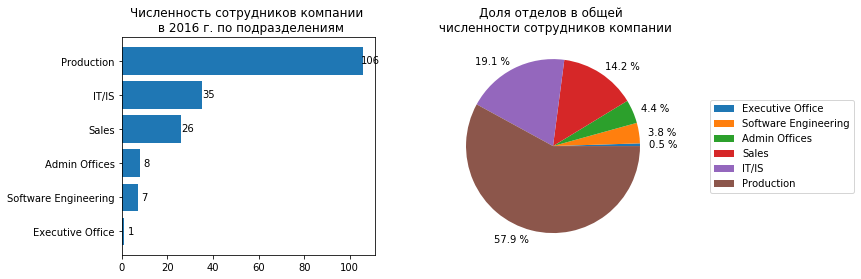

In [83]:
#переведем sql-запрос в датафрейм для визуализации
df_namber_of_employee = pd.read_sql_query(sql_str, conn)

#уберем пробелы в названии производственного департамента
df_namber_of_employee.iloc[5, 0] = df_namber_of_employee.iloc[5, 0].replace(' ', '')

#нарисуем два графика численности работников по департаментам и их доли в %

fig, (subplot_1, subplot_2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(10, 4)
)

subplot_1.barh(df_namber_of_employee['department'], df_namber_of_employee['count'])

#дополнительно создадим подписи данных
rects = subplot_1.patches

labels = df_namber_of_employee['count'].values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    subplot_1.text(rect.get_width() + 3, rect.get_y() + height / 3, label,
            ha='center', va='bottom')
    
subplot_1.set_title('Численность сотрудников компании \n в 2016 г. по подразделениям')

#нарисуем второй график (круговой)
wedges, text = subplot_2.pie(df_namber_of_employee['share'],
                           explode=None,
                           labels=[f'{share} %' for share in df_namber_of_employee.share.values])

#добавим легенду и название
subplot_2.legend(wedges, df_namber_of_employee.department, loc='center left', bbox_to_anchor=(1.2, 0, 0.5, 1))
subplot_2.set_title('Доля отделов в общей \n численности сотрудников компании')


**Более половины сотрудников компании работают на производстве** (57,9%), здесь занято 106 человек. Следующим по численности работников идет IT/IS подразделение, где работает 19,1% всех работников компании или 35 человек. Замыкает тройку самых крупных отделов - отдел продаж, здесь занято 26 человек, что составляет 14,2% от штата фирмы. На оставшиеся два подразделения (без учета гендиректора) - администрация и разработчики ПО, - приходится всего 8.2% работников компании (15 человек).

### Размер средней ставки заработной платы по департаментам

In [84]:
#создадим запрос, чтобы получить среднюю ставку зарплаты по всей компании в целом (для сотрудников со статусом 'Active'),
#округлим полученное значение до десятых и сохраним его в переменную avg_pay_rate
sql_str = """
        SELECT ROUND(CAST(AVG("Pay Rate") as numeric), 1) AS avg_pay_rate
        FROM hr_dataset
        WHERE "Employment Status" = 'Active';
"""

cursor.execute(sql_str)

for row in cursor:
    avg_pay_rate = row[0]
    print(avg_pay_rate)

33.8


In [85]:
#создадим запрос, чтобы получить среднюю ставку зарплаты по департаментам (для сотрудников со статусом 'Active')
#и округлим полученные значения до десятых
sql_str = """
        SELECT "department" AS department,
        ROUND(CAST(AVG("Pay Rate") as numeric), 1) AS avg_pay_rate
        FROM hr_dataset
        WHERE "Employment Status" = 'Active'
        GROUP BY "department"
        ORDER BY avg_pay_rate;
"""

cursor.execute(sql_str)

for row in cursor:
    print(row)

('Production       ', Decimal('23.7'))
('Admin Offices', Decimal('30.4'))
('IT/IS', Decimal('45.1'))
('Software Engineering', Decimal('48.6'))
('Sales', Decimal('55.4'))
('Executive Office', Decimal('80.0'))


In [87]:
#сохраним данные в датафрейм
df_avg_pay_rate_by_dep = pd.read_sql_query(sql_str, conn)
df_avg_pay_rate_by_dep

,department,avg_pay_rate
0,Production,23.7
1,Admin Offices,30.4
2,IT/IS,45.1
3,Software Engineering,48.6
4,Sales,55.4
5,Executive Office,80.0


Text(0.5, 1.0, 'Средняя ставка зарботной платы по департаментам')

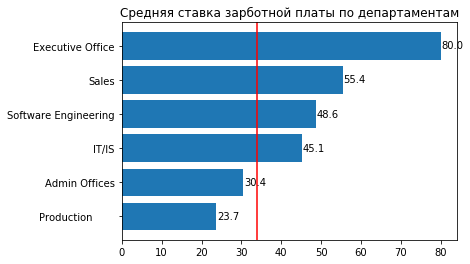

In [88]:
#нарисуем график (ставка по департаментам и средня ставка по компании - красная линия)
fig, subplot = plt.subplots()
subplot.barh(df_avg_pay_rate_by_dep['department'], df_avg_pay_rate_by_dep['avg_pay_rate'])
plt.axvline(x=avg_pay_rate, color='r')

#дополнительно создадим подписи данных
rects = subplot.patches

labels = df_avg_pay_rate_by_dep['avg_pay_rate'].values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    subplot.text(rect.get_width() + 3, rect.get_y() + height / 3, label,
            ha='center', va='bottom')
    
subplot.set_title('Средняя ставка зарботной платы по департаментам')

**Самая высокая ставка оплаты труда** (за исключением ставки ген. директора) зафиксирована **в департаменте продаж (Sales)** и составляет 55.4 долл. **Ставка ниже средней по компании имеет место по административному (Admin Offises) и производственному подразделениям (Production)** - 30.4 и 23.7 долл. соответственно.

### Анализ увольнений по департаментам

#### Количество увольнений по департаментам за последние 2 года по которым имеются данные (2015-2016 гг.)

In [89]:
# количество увольнений по департаментам за последние 2 года (2015-2016 гг.). Получим данные из БД:
sql_str = """
        SELECT department AS department, DATE_PART('year', "Date of Termination") AS year,
        COUNT(*) AS number_of_term
        FROM hr_dataset
        WHERE DATE_PART('year', "Date of Termination") = 2016 OR DATE_PART('year', "Date of Termination") = 2015
        GROUP BY department, DATE_PART('year', "Date of Termination")
        ORDER BY department, year;
"""
cursor.execute(sql_str)

for row in cursor:
    print(row)

('Admin Offices', 2015.0, 2)
('IT/IS', 2015.0, 7)
('IT/IS', 2016.0, 3)
('Production       ', 2015.0, 16)
('Production       ', 2016.0, 11)
('Sales', 2015.0, 1)
('Software Engineering', 2015.0, 1)


In [90]:
# для отрисовки диаграммы, загрузим в датафрейм
df_number_of_termination = pd.read_sql_query(sql_str, conn)
df_number_of_termination

,department,year,number_of_term
0,Admin Offices,2015.0,2
1,IT/IS,2015.0,7
2,IT/IS,2016.0,3
3,Production,2015.0,16
4,Production,2016.0,11
5,Sales,2015.0,1
6,Software Engineering,2015.0,1


In [91]:
# добавим в датафрейм строки с недостающими годами по каждому департаменту
for dep in df_number_of_termination['department'].unique():
    if 2015.0 not in df_number_of_termination[df_number_of_termination['department'] == dep]['year'].values:
        df_term = df_number_of_termination.append(
            {'department' : dep, 'year' : 2015.0, 'number_of_term' : 0}, ignore_index=True)
        df_number_of_termination = df_term
    if 2016.0 not in df_number_of_termination[df_number_of_termination['department'] == dep]['year'].values:
        df_term = df_number_of_termination.append(
            {'department' : dep, 'year' : 2016.0, 'number_of_term' : 0}, ignore_index=True)
        df_number_of_termination = df_term

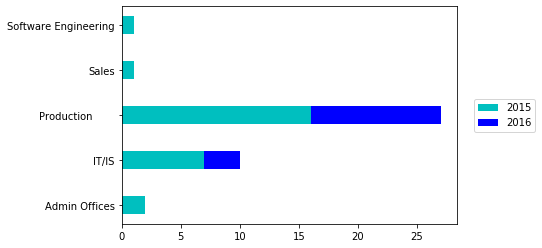

In [92]:
# Нарисуем график с накоплением количества увольнений за два последние года (2015, 2016 гг.):
fig, subplot = plt.subplots()

for dep in df_term['department'].unique().tolist():
    x1 = dep
    y1 = df_term[(df_term['year'] == 2015.0) & (df_term['department'] == dep)]['number_of_term'].values
    subplot.barh(x1, y1, color='c', height=0.4)
    y2 = df_term[(df_term['year'] == 2016.0) & (df_term['department'] == dep)]['number_of_term'].values
    subplot.barh(x1, y2, color='b', height=0.4, left=y1)
        
plt.legend([2015, 2016], loc="center right", bbox_to_anchor=(0.75, 0, 0.5, 1))

Из диаграммы видно, что **за последние 2 года (2015-2016 гг.) больше всего увольнений приходится на наиболее многочисленное Производственное подразделение компании**. В 2016 году увольнения были только в Произвоственном и IT/IS департаменте. 

#### Причины увольнений сотрудников по компании в целом за последний год, по которому имеются данные (2016 гг.)

In [133]:
#рассмотрим причины увольнений в целом по компании за последние 2 года (2015-2016 гг.)
sql_str = """
        SELECT "Reason For Term" reason_for_term, 
        COUNT(*) AS count,
        COUNT(*) * 100 / (SELECT COUNT(*) FROM hr_dataset
        WHERE "Reason For Term" NOT IN ('N/A - still employed', 'N/A - Has not started yet')
        AND DATE_PART('year', "Date of Termination") = 2016) AS share
        FROM hr_dataset
        WHERE "Reason For Term" NOT IN ('N/A - still employed', 'N/A - Has not started yet') 
        AND DATE_PART('year', "Date of Termination") = 2016
        GROUP BY "Reason For Term"
        ORDER BY count;
"""

cursor.execute(sql_str)

for row in cursor:
    print(row)

('unhappy', 1, 7)
('gross misconduct', 1, 7)
('hours', 1, 7)
('maternity leave - did not return', 1, 7)
('Another position', 1, 7)
('career change', 1, 7)
('attendance', 2, 14)
('retiring', 2, 14)
('more money', 2, 14)
('performance', 2, 14)


In [134]:
#переведем данные в датафрейм
df_reason_for_term = pd.read_sql_query(sql_str, conn)
df_reason_for_term

,reason_for_term,count,share
0,unhappy,1,7
1,gross misconduct,1,7
2,hours,1,7
3,maternity leave - did not return,1,7
4,Another position,1,7
5,career change,1,7
6,attendance,2,14
7,retiring,2,14
8,more money,2,14
9,performance,2,14


Text(0.5, 1.0, 'Доля причин увольнений в 2016 г.')

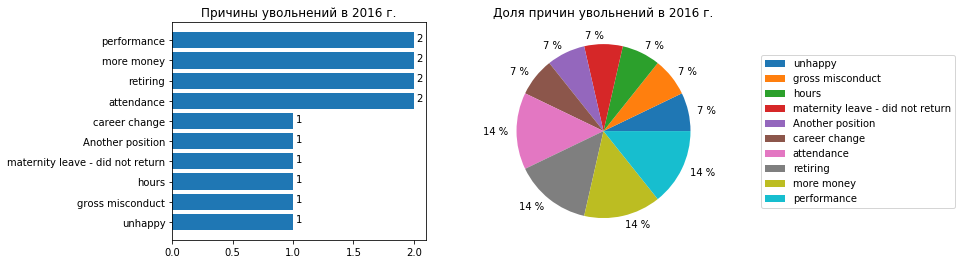

In [136]:
#нарисуем два графика причин увольнений и их доли в %

fig, (subplot_1, subplot_2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(10, 4)
)

subplot_1.barh(df_reason_for_term['reason_for_term'], df_reason_for_term['count'])

#дополнительно создадим подписи данных
rects = subplot_1.patches

labels = df_reason_for_term['count'].values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    subplot_1.text(rect.get_width() + 0.05, rect.get_y() + height / 3, label,
            ha='center', va='bottom')
    
subplot_1.set_title('Причины увольнений в 2016 г.')

#нарисуем второй график (круговой)
wedges, text = subplot_2.pie(df_reason_for_term['share'],
                           explode=None,
                           labels=[f'{share} %' for share in df_reason_for_term['share'].values])

#добавим легенду и название
subplot_2.legend(wedges, df_reason_for_term.reason_for_term, loc='center left', bbox_to_anchor=(1.2, 0, 0.5, 1))
subplot_2.set_title('Доля причин увольнений в 2016 г.')

**Наиболее распространенными причинами увольнения** сотрудников за последние 2 года (2015, 2016 гг.) являются следующие четыре:

* **неудовлетворенность зарплатой**
* **низкая производительность**
* **выход на пенсию**
* **неудовлетворительная посещаемость**


Как видно из диагаммы, **почти половина всех увольнений (42%) происходит по инициативе работодателя** (вследствие таких причин, как низкие показатели производительности, неудовлетворительная посещаемость, грубый проступок, 'hours'). То есть, в компании есть определенные проблемы с дисциплиной, что может быть связано с неправильным подбором персонала, либо недостатками мотивационной политики компании.

**21% увольнений связан с неудовлетворенностью работниками условиями труда и  заработной платой**.

**остальные 37% увольнений связаны с естественными причинами**: выход на пенсию, выход в отпуск по уходу за ребенком, переход на другую должность и смена карьеры. 

### Текучесть кадров по департаментам

Как было отмечено ранее, текучесть в компании сокращается, и по последним имеющимся данным (за 2016 год) находится на естественном уровне, способствующем обновлению кадров и не требующем больших затрат на подбор новых кадров.
Рассмотрим теперь текучесть персонала по департаментам за последний год (2016).

In [110]:
#Поскольку увольнения в 2016 были только в двух департаментах, посчитаем текучесть для каждого из них
#Рассчитаем текучесть для производственного подразделения компании:

sql_str = """
        SELECT department, DATE_PART('year', "Date of Termination") AS year,
        CAST (COUNT(*) AS FLOAT) * 100 / (SELECT CAST (COUNT(*) AS FLOAT) FROM hr_dataset
        WHERE "Employment Status" = 'Active' 
        AND department = 'Production       ') AS turnover
        FROM hr_dataset
        WHERE DATE_PART('year', "Date of Termination") = 2016 AND department = 'Production       '
        GROUP BY department, DATE_PART('year', "Date of Termination")
        ORDER BY department;
"""
cursor.execute(sql_str)

for row in cursor:
    print(row)

('Production       ', 2016.0, 10.377358490566)


In [111]:
#сохраним в датафрейм
df_turnover_production = pd.read_sql_query(sql_str, conn)
df_turnover_production

,department,year,turnover
0,Production,2016.0,10.377358


In [112]:
# Посчитаем текучесть для IT/IS отдела компании:

sql_str = """
        SELECT department, DATE_PART('year', "Date of Termination") AS year,
        CAST (COUNT(*) AS FLOAT) * 100 / (SELECT CAST (COUNT(*) AS FLOAT) FROM hr_dataset
        WHERE "Employment Status" = 'Active' 
        AND department = 'IT/IS') AS turnover
        FROM hr_dataset
        WHERE DATE_PART('year', "Date of Termination") = 2016 AND department = 'IT/IS'
        GROUP BY department, DATE_PART('year', "Date of Termination")
        ORDER BY department;
"""
cursor.execute(sql_str)

for row in cursor:
    print(row)

('IT/IS', 2016.0, 8.57142857142857)


In [113]:
# Сохраним в датафрейм
df_turnover_it = pd.read_sql_query(sql_str, conn)
df_turnover_it

,department,year,turnover
0,IT/IS,2016.0,8.571429


In [114]:
# Объединим датафреймы для наглядности:
df_turnover_2016 = pd.concat([df_turnover_production, df_turnover_it], ignore_index=True)
df_turnover_2016

,department,year,turnover
0,Production,2016.0,10.377358
1,IT/IS,2016.0,8.571429


Таким образом, если для компании в целом текучесть кадров в 2016 г. находится на естественном уровне, то в разрезе отдельных подразделений, она достигает более высоких показателей.

**Текучесть персонала по подразделению "IT/IS"** (8,6%) **находится на среднем уровне** и, в целом, является приемлемой для компании. 

**По производственному департаменту этот показатель достигает 10,4%, что соответствует высокому уровню текучести персонала**и увеличивает нагрузку на hr-отдел по обеспечению данного подразделения кадрами. Такая ситуация может говорить о том, что **у компании есть проблемы со стратегией управления персоналом производственного подразделения.** 

Для более детального понимания ситуации, изучим основные причины увольнений в производственном отделе в 2016 году.

### Причины увольнений в производственном подразделении в 2016 г.

In [146]:
#выгрузим причины увольнений в производственном отделе за последний доступный год (2016 г.)
sql_str = """
        SELECT "Reason For Term" reason_for_term,
        COUNT(*) AS count,
        ROUND(CAST(COUNT(*) * 100. / (SELECT COUNT(*) FROM hr_dataset
        WHERE "Reason For Term" NOT IN ('N/A - still employed', 'N/A - Has not started yet') 
        AND DATE_PART('year', "Date of Termination") = 2016
        AND "department" = 'Production       ') as numeric), 1) AS share     
        FROM hr_dataset
        WHERE "Reason For Term" NOT IN ('N/A - still employed', 'N/A - Has not started yet') 
        AND DATE_PART('year', "Date of Termination") = 2016
        AND "department" = 'Production       '
        GROUP BY "Reason For Term"
        ORDER BY count DESC
        LIMIT 10;
"""

cursor.execute(sql_str)

for row in cursor:
    print(row)

('attendance', 2, Decimal('18.2'))
('retiring', 2, Decimal('18.2'))
('more money', 2, Decimal('18.2'))
('performance', 1, Decimal('9.1'))
('Another position', 1, Decimal('9.1'))
('unhappy', 1, Decimal('9.1'))
('gross misconduct', 1, Decimal('9.1'))
('maternity leave - did not return', 1, Decimal('9.1'))


In [147]:
# выгрузим в датафрейм для наглядности
df_term_in_product_dep = pd.read_sql_query(sql_str, conn)
df_term_in_product_dep

,reason_for_term,count,share
0,attendance,2,18.2
1,retiring,2,18.2
2,more money,2,18.2
3,performance,1,9.1
4,Another position,1,9.1
5,unhappy,1,9.1
6,gross misconduct,1,9.1
7,maternity leave - did not return,1,9.1


**Наибольшее количество увольнений по производствееному отделу** связано со следующими причинами:
* неудовлетворительная посещаемость
* выход на пенсию
* неудовлетворенность зарплатой

**Треть всех увольнений (36%) приходится на увольнения по инициативе работодателя** и связаны с неудовлетворительной посещаемостью, низкими показателями производительности и грубым проступком.

**Другая треть всех увольнений (36%) связана с естественными причинами** - выход на пенсию, отпуск по уходу за ребенком, переход на другую должность.

**Меньше трети увольнений (28%) связаны с неудовлетворенностью работой и заработной платой**.

#### Выводы:

1. Больше всего увольнений приходится на наиболее многочисленный Производственный отдел. Текучесть кадров по данному подразделению соответствует высокому уровню и приводит к повышенной нагрузке на отдел кадров, способствует росту расходов на рекрутинг. 
2. Треть всех увольнений в производственном отделе приходится на увольнения по инициативе работодателя, что может свидетельствовать о некорректном подборе персонала. Также это может быть связано с низкой мотивацией работника. 

#### HR-отделу рекомендуется:

1. Формировать кадровый резерв для своевременного пополнения кадров в производственном отделе
2. Провести дополнительный анализ анкет работников, которых уволили по инициативе работодателя с целью выявления схожих характеристик, которые следует учитывать при рекрутинге в производственный отдел.
3. Также рекомендуется пересмотреть мотивационную политику, направленную на работников Производственого отдела, главным образом конкурентоспособность заработной платы, системы вознаграждений и условий труда для сокращения текучести кадров и снижения нагрузки на бюджет по рекрутингу.

### Средний возраст и стаж работников компании

In [161]:
#Рассчитаем средний возраст работников в компании целом (со статусом 'Active') и сохраним результат в переменную avg_age
sql_str = """
        SELECT AVG("age")
        FROM hr_dataset
        WHERE "department" != 'Executive Office'
        AND "Employment Status" = 'Active';
"""

cursor.execute(sql_str)

for row in cursor:
    avg_age = round(float(row[0]), 1)
    print(avg_age)

38.0


In [162]:
#Рассчитаем средний возраст работников в компании по отдельным департаментам (со статусом 'Active')
sql_str = """
        SELECT "department" AS department, 
        ROUND(CAST(AVG("age") as numeric), 1) AS avg_age
        FROM hr_dataset
        WHERE "department" != 'Executive Office'
        AND "Employment Status" = 'Active'
        GROUP BY "department"
        ORDER BY avg_age;
"""

cursor.execute(sql_str)

for row in cursor:
    print(row)

('Admin Offices', Decimal('32.5'))
('Software Engineering', Decimal('36.4'))
('IT/IS', Decimal('37.4'))
('Sales', Decimal('38.5'))
('Production       ', Decimal('38.5'))


In [153]:
df_avg_age_by_department = pd.read_sql_query(sql_str, conn)
df_avg_age_by_department

,department,avg_age
0,Admin Offices,32.5
1,Software Engineering,36.4
2,IT/IS,37.4
3,Sales,38.5
4,Production,38.5


Text(0.5, 1.0, 'Средний возраст работников по департаментам')

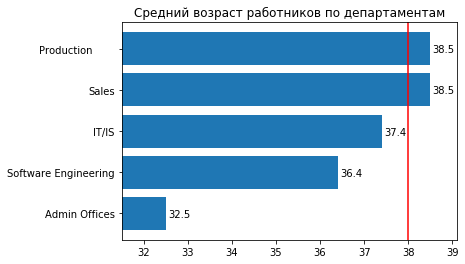

In [215]:
#нарисуем график среднего возраста по департаментам и линию среднего возраста по компании (красная линия)
fig, subplot = plt.subplots()
subplot.barh(df_avg_age_by_department['department'], df_avg_age_by_department['avg_age'])
plt.axvline(x=avg_age, color='r')

#установим минимальные x
x_min = df_avg_age_by_department['avg_age'].min() - 1
x_max = df_avg_age_by_department['avg_age'].max() + 0.6
subplot.set_xlim(x_min, x_max)

#дополнительно создадим подписи данных
rects = subplot.patches

labels = df_avg_age_by_department['avg_age'].values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    subplot.text(rect.get_width() + 0.3, rect.get_y() + height/3, label,
            ha='center', va='bottom')
    
subplot.set_title('Средний возраст работников по департаментам')

**Наиболее возрастной состав работников занят в Производственном подразделении и отделе Продаж**. Средний возраст сотрудников здесь выше среднего по компании. К самым "молодым" подразделениям относятся администрация и отдел разработчиков программного обеспечения.

In [194]:
#Рассчитаем средний стаж работы в компании целом и округлим до десятых
sql_str = """
        SELECT ROUND(CAST(AVG("Days Employed") / 365 AS NUMERIC), 1)
        FROM hr_dataset;
"""

In [195]:
cursor.execute(sql_str)

In [196]:
#согхраним средний стаж в переменную avg_seniority
for row in cursor:
    avg_seniority = float(row[0])
    print(avg_seniority)

3.6


In [220]:
#рассчитаем средний стаж по департаментам
sql_str = """
        SELECT department,
        ROUND(CAST(AVG("Days Employed") / 365 as numeric), 1) AS seniority
        FROM hr_dataset
        GROUP BY department
        ORDER BY seniority;
"""

cursor.execute(sql_str)

for row in cursor:
    print(row)

('IT/IS', Decimal('2.7'))
('Production       ', Decimal('3.6'))
('Admin Offices', Decimal('3.9'))
('Software Engineering', Decimal('3.9'))
('Sales', Decimal('4.4'))
('Executive Office', Decimal('5.4'))


In [221]:
#сохраним данные в датафрейм
df_seniority_by_department = pd.read_sql_query(sql_str, conn)
df_seniority_by_department

,department,seniority
0,IT/IS,2.7
1,Production,3.6
2,Admin Offices,3.9
3,Software Engineering,3.9
4,Sales,4.4
5,Executive Office,5.4


Text(0.5, 1.0, 'Средний стаж работников по департаментам')

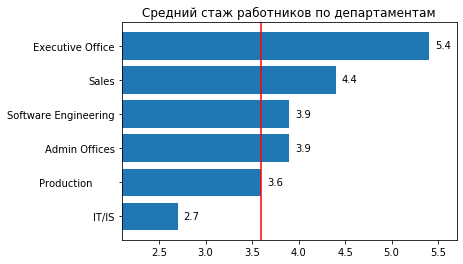

In [235]:
# нарисуем bar-chart среднего стажа по подразделениям и линию среднего стажа по компании в целом (красная линия)
fig, subplot = plt.subplots()
subplot.barh(df_seniority_by_department['department'], df_seniority_by_department['seniority'])
plt.axvline(x=avg_seniority, color='r')

#дополнительно создадим подписи данных
rects = subplot.patches

labels = df_seniority_by_department['seniority'].values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    subplot.text(rect.get_width() + 0.15, rect.get_y() + height/3, label,
            ha='center', va='bottom')
    
#установим минимальные x
x_min = df_seniority_by_department['seniority'].min() - 0.6
x_max = df_seniority_by_department['seniority'].max() + 0.3
subplot.set_xlim(x_min, x_max)
    
subplot.set_title('Средний стаж работников по департаментам')

Из диаграммы видно, что **средний стаж сотрудников IT/IS департамента ниже среднего**, а **производственного подразделения равен среднему стажу** по компании в целом. На ряду с относительно высоким уровнем текучести по данным отделам это может свидетельствовать о наличии кадровых проблем. Учитывая причины увольнения по этим подразделениям за 2016 г., данные проблемы могут быть связаны с подбором персонала, условиями труда, мотивационной стратегей hr-отдела, неконкурентоспособной заработной платой. 

### Средний стаж сотрудников на момент увольнения

In [256]:
#рассчитаем средний стаж работников на момент увольнения (по компании в целом) за последние два года (2015 и 2016 гг.)
#и сохраним в переменную avg_seniority_term
sql_str = """
        SELECT AVG("Date of Termination" - "Date of Hire") / 365 AS avg_seniority_termination
        FROM hr_dataset
        WHERE "Date of Termination" IS NOT NULL
        AND DATE_PART('year', "Date of Termination") IN (2015, 2016);
"""
cursor.execute(sql_str)

for row in cursor:
    avg_seniority_term = round(float(row[0]), 1)
    print(avg_seniority_term)

3.3


In [257]:
#рассчитаем средний стаж работников на момент увольнения (по компании в целом) за последние два года (2015 и 2016 гг.)
sql_str = """
        SELECT department,
        ROUND(CAST(AVG("Date of Termination" - "Date of Hire") / 365 as numeric), 1) AS avg_seniority_term
        FROM hr_dataset
        WHERE "Date of Termination" IS NOT NULL
        AND DATE_PART('year', "Date of Termination") IN (2015, 2016)
        GROUP by department
        ORDER BY avg_seniority_term;
"""
cursor.execute(sql_str)
for row in cursor:
    print(row[0], row[1])

IT/IS 1.2
Sales 1.2
Admin Offices 2.3
Software Engineering 3.8
Production        4.2


In [258]:
#сохраним данные в датафрейм
df_avg_seniority_termination = pd.read_sql_query(sql_str, conn)
df_avg_seniority_termination

,department,avg_seniority_term
0,IT/IS,1.2
1,Sales,1.2
2,Admin Offices,2.3
3,Software Engineering,3.8
4,Production,4.2


Text(0.5, 1.0, 'Средний стаж работников по департаментам на момент увольнения (2015-2016 гг.)')

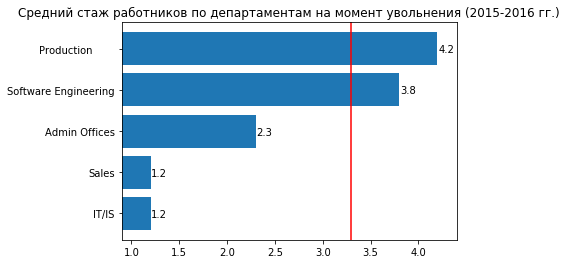

In [265]:
#нарисуем bar-chart средний стаж работников на момент увольнения по департаментам и линию(по компании в целом)
fig, subplot = plt.subplots()
subplot.barh(df_avg_seniority_termination['department'], df_avg_seniority_termination['avg_seniority_term'])
plt.axvline(x=avg_seniority_term, color='r')

#дополнительно создадим подписи данных
rects = subplot.patches

labels = df_avg_seniority_termination['avg_seniority_term'].values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    subplot.text(rect.get_width() + 0.09, rect.get_y() + height/3, label,
            ha='center', va='bottom')
    
#установим минимальные x
x_min = df_avg_seniority_termination['avg_seniority_term'].min() - 0.3
x_max = df_avg_seniority_termination['avg_seniority_term'].max() + 0.2
subplot.set_xlim(x_min, x_max)
    
subplot.set_title('Средний стаж работников по департаментам на момент увольнения (2015-2016 гг.)')

Анализ показал, что **самый низкий средний стаж сотрудника на момент увольнения**, чуть больше 1 года (1,2 года), наблюдается **в подразделениях IT/IS и Продаж**.  
**Наиболее высокие показатели среднего стажа на момент увольнения имеют работники Производственного отдела и отдела Программного обеспечения** (4,2 и 3,8 лет соответственно).
**Средний стаж работы по Административному подразделениям ниже среднего по компании** и составляет 2,3 года. 

**Рекомендации hr-отделу:**
1. **Оказывать поддержку сотрудникам IT/IS отдела и отдела Продаж в адаптационный период**, потому что именно в это время наблюдается больше всего увольнений
2. **По истечению сроков с момента начала работы нового сотрудника,** отраженных на диаграмме (около 2-х лет для Административного отдела, около 3-х лет для отдела Программного обеспечения и Производственного подразделения) **рекомендуется применять методы по удержанию ключевых работников**, а также **подготовить кандидатов из кадрового резерва для своевременной замены увольняющихся**.

### Производительность сотрудников компании
Сначала определим долю работников по показателю производительности в целом по компании.

In [276]:
#создадим запрос для получения информации по доле сотрудников компании по производительности и округлим до десятых
sql_str = """
        SELECT DISTINCT "Performance Score",
        COUNT(*) OVER (partition by "Performance Score") AS numb_employee,
        ROUND(CAST(100.0 * COUNT(*) OVER (partition by "Performance Score") / COUNT(*) 
        OVER () as numeric), 1) AS share
        FROM hr_dataset
        WHERE "Employment Status" = 'Active'
        ORDER BY share;
"""

cursor.execute(sql_str)

for row in cursor:
    print(row)

('PIP', 5, Decimal('2.7'))
('Needs Improvement', 7, Decimal('3.8'))
('Exceptional', 9, Decimal('4.9'))
('N/A- too early to review', 15, Decimal('8.2'))
('90-day meets', 16, Decimal('8.7'))
('Exceeds', 18, Decimal('9.8'))
('Fully Meets', 113, Decimal('61.7'))


In [277]:
#переведем в датафрейм, чтобы построить графики для наглядности
df_perf_score = pd.read_sql_query(sql_str, conn)
df_perf_score

,Performance Score,numb_employee,share
0,PIP,5,2.7
1,Needs Improvement,7,3.8
2,Exceptional,9,4.9
3,N/A- too early to review,15,8.2
4,90-day meets,16,8.7
5,Exceeds,18,9.8
6,Fully Meets,113,61.7


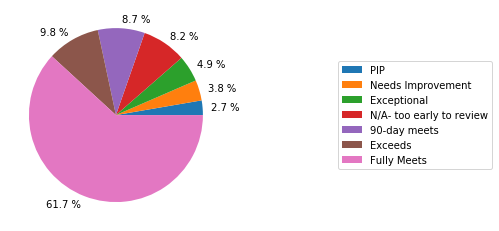

In [278]:
#нарисуем график:
fig, subplot = plt.subplots()
wedges, text = subplot.pie(df_perf_score['share'],
                           explode=None,
                           labels=[f'{share} %' for share in df_perf_score.share.values])
subplot.legend(wedges, df_perf_score['Performance Score'], loc='center left', bbox_to_anchor=(1.5, 0, 0.5, 1))

Из полученных данных видно, что **более половины сотрудников (61,7%)** компании по показателю производительности **полностью соответствуют ожиданиям (Fully Meets)**, еще **8,7% работников достигают нужного уровня производительности уже 3 месяца подряд** (90-day meets).

**14.7% сотрудников компании перевыполняют план**, из них 9,8% - превосходят плановую производительность (Exceeds) и еще 4,9% показывают выдающиеся результаты (Exceptional). 

Таким образом **основная часть сотрудников компании (85.1%) достигает или даже превышает плановые показатели по производительности**. 

8.2% работников компании пока не прошли проверку, и **только 6.5% работников компании НЕ показывают нужный уровень производительности** (Needs Improvement, PIP). При этом 2.7% из них уже включены в план по увеличению производительности (PIP). 

Теперь расcмотрим показатели производительности по департаментам для выявления наличия проблем в конкретных подразделениях.

In [279]:
#получим данные по производительности по каждому отдельному департаменту
sql_str = """
        SELECT DISTINCT department, "Performance Score",
        COUNT(*) OVER (partition by department, "Performance Score") AS numb_employee,
        ROUND(CAST(100.0 * COUNT(*) OVER (partition by department, "Performance Score") / COUNT(*) 
        OVER (partition by department) as numeric), 1) AS share
        FROM hr_dataset
        WHERE "Date of Termination" IS NULL
        ORDER BY department;
"""

cursor.execute(sql_str)

for row in cursor:
    print(row)

('Admin Offices', '90-day meets', 1, Decimal('14.3'))
('Admin Offices', 'Fully Meets', 5, Decimal('71.4'))
('Admin Offices', 'N/A- too early to review', 1, Decimal('14.3'))
('Executive Office', 'Fully Meets', 1, Decimal('100.0'))
('IT/IS', 'Exceptional', 4, Decimal('10.0'))
('IT/IS', '90-day meets', 6, Decimal('15.0'))
('IT/IS', 'N/A- too early to review', 8, Decimal('20.0'))
('IT/IS', 'Exceeds', 2, Decimal('5.0'))
('IT/IS', 'Needs Improvement', 1, Decimal('2.5'))
('IT/IS', 'Fully Meets', 19, Decimal('47.5'))
('Production       ', 'Needs Improvement', 4, Decimal('3.2'))
('Production       ', 'Exceptional', 4, Decimal('3.2'))
('Production       ', '90-day meets', 7, Decimal('5.6'))
('Production       ', 'PIP', 3, Decimal('2.4'))
('Production       ', 'Fully Meets', 78, Decimal('62.4'))
('Production       ', 'Exceeds', 16, Decimal('12.8'))
('Production       ', 'N/A- too early to review', 13, Decimal('10.4'))
('Sales', '90-day meets', 2, Decimal('7.4'))
('Sales', 'N/A- too early to revie

In [280]:
#переведем в датафрейм, чтобы построить графики для наглядности
df_perf_score_by_dep = pd.read_sql_query(sql_str, conn)
df_perf_score_by_dep

,department,Performance Score,numb_employee,share
0,Admin Offices,90-day meets,1,14.3
1,Admin Offices,Fully Meets,5,71.4
2,Admin Offices,N/A- too early to review,1,14.3
3,Executive Office,Fully Meets,1,100.0
4,IT/IS,Exceptional,4,10.0
5,IT/IS,90-day meets,6,15.0
6,IT/IS,N/A- too early to review,8,20.0
7,IT/IS,Exceeds,2,5.0
8,IT/IS,Needs Improvement,1,2.5
9,IT/IS,Fully Meets,19,47.5


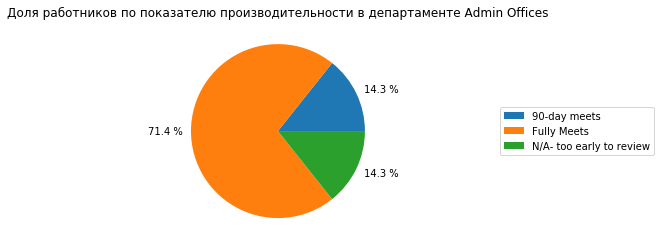

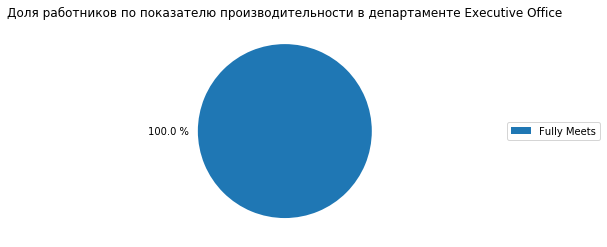

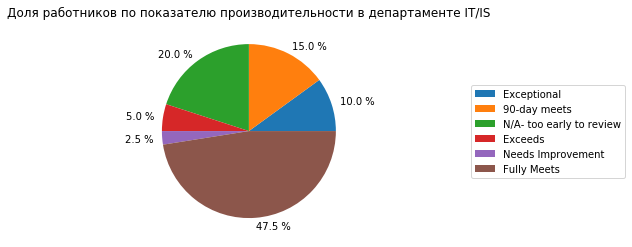

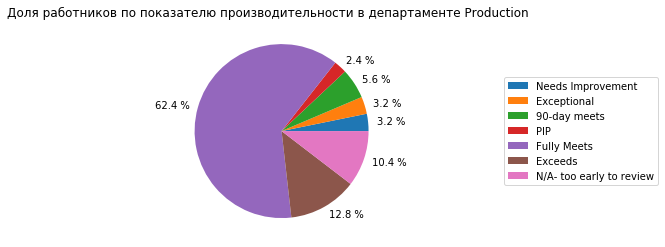

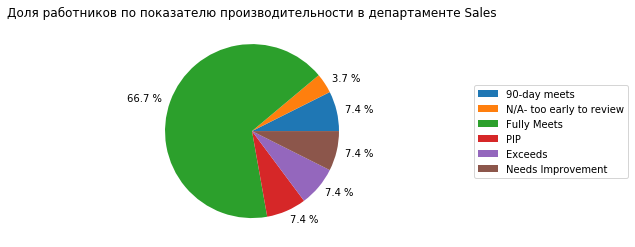

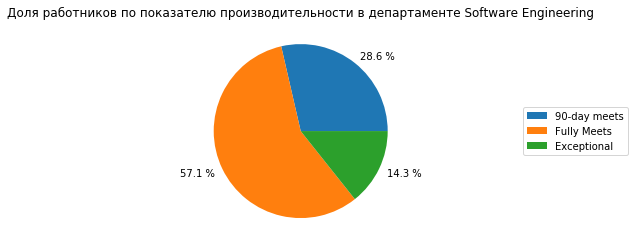

In [281]:
# Построим круговые диаграммы по каждому департаменту
# В цикле нарисуем 15 графиков, для этого созадим на каждом этапе цикла по холсту
departments = df_perf_score_by_dep['department'].unique().tolist()
for n in range (6):
    n1 = str(n)
    name_subplot = 'subplot' + n1
    name_fig = 'fig' + n1
    name_fig, name_subplot = plt.subplots()
    wedges, text = name_subplot.pie(df_perf_score_by_dep[df_perf_score_by_dep['department'] == departments[n]]['share'],
                                    explode=None,
                                    labels=[f'{share} %' for share in df_perf_score_by_dep[
                                        df_perf_score_by_dep['department'] == departments[n]]['share'].values])
    name_subplot.legend(wedges, df_perf_score_by_dep[df_perf_score_by_dep['department'] == departments[n]][
        'Performance Score'], loc='center left', bbox_to_anchor=(1.5, 0, 0.5, 1))  
    name_subplot.set_title(f'Доля работников по показателю производительности в департаменте {departments[n]}')

Между диаграммами по подразделениям есть определенные отличия, но тем не менее, в целом они повторяют общую тенденцию и **ситуация с показателями производительности сотрудников по компании весьма ровная**. Тем не менее, **можно выделить подразделения Admin Officer и Software Engineering** (Executive Officer не берем в расчет), **по которым все сотрудники достигают нужных показателей производительности**. Вероятно это связано с их малочисленностью (в них работает по 7 человек в каждом).

Теперь проанализируем, есть ли зависимость между показателями производительности и возрастом сотрудника компании, а также стажем работы в компании и производительностью работника:

### Гипотезы 1 и 2. Между средним возрастом сотрудников и производительностью, средним стажем и производительностью есть взаимосвязь.

In [440]:
# выгрузим из БД средний возраст и средний стаж работника по показателям производительности, округлим до десятых:
sql_str = """
        SELECT "Performance Score", 
        COUNT(*) as count,
        ROUND(CAST(AVG(age) as numeric), 1) AS avg_age,
        ROUND(CAST(AVG("Days Employed") / 365 as numeric), 1) AS avg_exp
        FROM hr_dataset
        WHERE "Employment Status" = 'Active'
        AND "Performance Score" != 'N/A- too early to review'
        GROUP BY "Performance Score"
        ORDER BY avg_age;
"""

cursor.execute(sql_str)

for row in cursor:
    print(row)

('Needs Improvement', 7, Decimal('36.0'), Decimal('5.0'))
('90-day meets', 16, Decimal('36.8'), Decimal('3.8'))
('Exceptional', 9, Decimal('38.0'), Decimal('4.7'))
('Fully Meets', 113, Decimal('38.7'), Decimal('4.5'))
('Exceeds', 18, Decimal('39.4'), Decimal('5.3'))
('PIP', 5, Decimal('40.6'), Decimal('4.4'))


In [441]:
#переведем в датафрейм для нагядности
df_perf_score_age_exp= pd.read_sql_query(sql_str, conn)
df_perf_score_age_exp

,Performance Score,count,avg_age,avg_exp
0,Needs Improvement,7,36.0,5.0
1,90-day meets,16,36.8,3.8
2,Exceptional,9,38.0,4.7
3,Fully Meets,113,38.7,4.5
4,Exceeds,18,39.4,5.3
5,PIP,5,40.6,4.4


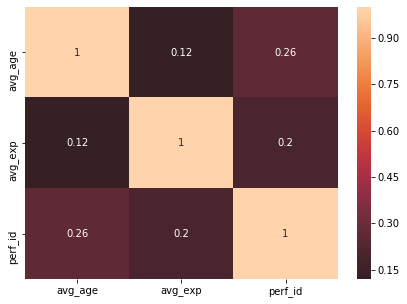

In [296]:
#для расчета коэффициента корреляции переведем номинальную шкалу производительности в ранговую 
#(1-самая ниpкая производительность (Needs Improvement), 5 - самая высокая (Exceptional)) и построим матрицу
df_perf_score_age_exp['perf_id'] = [1, 3, 6, 4, 5, 2]
research_list = ['avg_age', 'avg_exp', 'perf_id']
corr_p = df_perf_score_age_exp[research_list].corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr_p, center=0, annot=True)

**Из таблицы видно, что есть определенная связь между возрастом и показателями производительности**. Cамое низкое значение среднего возраста (36,0 лет) зафиксировано у работников, нуждающихся в улучшении показателя производительности (Needs Improvement). При этом средний возраст работников, чьи показатели соответствуют плановым или их превышают, более 38,0 лет.

С другой стороны, средний возраст работников, включенных в план по увеличению производительности (PIP) составляет 40,6 лет, что свидетельствует о том, что часть более возрастных сотрудников может показывать низкие результаты.

О наличии слабой связи между возрастом и показателем производительности говорит и коэффициент корреляции Пирсона (0,26).

**Что касается стажа работы в компании, то прямой связи с производительностью не наблюдается**. Низкие показатели производительности показывают далеко не новые работники. Средний стаж тех, кто не достигает плановых показателей составляет 5,0 лет, а тех кто включен в план по увеличению производительности - 4,4 года. Для сравнения, сотрудники с меньшим показателем среднего стажа (3,8 лет) показывают плановые показатели в течение 3 месяцев подряд (90-day meets), а со средним стажем 4,5 лет - полностью соответствуют ожиданиям компании по своим показателям производительности (Fully Meets).

**В целом, на основании анализа можно дать рекомендацию hr-отделу оказывать большую поддержку молодым сотрудникам** для того, чтобы их показатели производительности быстрее выходили на требуемый уровень, поскольку отставание каждого сотрудника порождает уменьшение выручки компании. Также **в процессе рекрутинга рекомендуется отдавать прредпочтение более возрастным, а следовательно и более опытным работникам**, поскольку именно они достигаю наилучших показателей по производительности.

Теперь рассмотрим данные метрики в разрезе отдельных департаментов, чтобы понять для всех ли подразделений справедливы сделанные выше выводы.

In [304]:
# выгрузим из БД средний возраст и стаж работника по показателям производительности в разрезе отдельных департаментов:
sql_str = """
        SELECT department, "perf_scoreid", "Performance Score", 
        ROUND(CAST(AVG(age) as numeric), 1) AS avg_age,
        ROUND(CAST(AVG("Days Employed") / 365 as numeric), 1) AS avg_experience
        FROM hr_dataset
        WHERE "Date of Termination" IS NULL
        GROUP BY department, "Performance Score", "perf_scoreid"
        ORDER BY department, "avg_age";
"""

cursor.execute(sql_str)

for row in cursor:
    print(row)

('Admin Offices', 9, 'N/A- too early to review', Decimal('30.0'), Decimal('2.6'))
('Admin Offices', 0, '90-day meets', Decimal('31.0'), Decimal('2.8'))
('Admin Offices', 3, 'Fully Meets', Decimal('33.4'), Decimal('5.4'))
('Executive Office', 3, 'Fully Meets', Decimal('63.0'), Decimal('5.4'))
('IT/IS', 2, 'Needs Improvement', Decimal('31.0'), Decimal('5.8'))
('IT/IS', 5, 'Exceptional', Decimal('34.3'), Decimal('5.1'))
('IT/IS', 9, 'N/A- too early to review', Decimal('34.8'), Decimal('2.3'))
('IT/IS', 4, 'Exceeds', Decimal('38.0'), Decimal('5.4'))
('IT/IS', 0, '90-day meets', Decimal('38.2'), Decimal('2.9'))
('IT/IS', 3, 'Fully Meets', Decimal('39.6'), Decimal('2.6'))
('Production       ', 9, 'N/A- too early to review', Decimal('34.2'), Decimal('2.4'))
('Production       ', 2, 'Needs Improvement', Decimal('36.5'), Decimal('5.7'))
('Production       ', 0, '90-day meets', Decimal('38.4'), Decimal('4.3'))
('Production       ', 3, 'Fully Meets', Decimal('38.9'), Decimal('4.9'))
('Production 

In [305]:
#выгрузим данные в датафрейм
df_avg_age_by_dep = pd.read_sql_query(sql_str, conn)
df_avg_age_by_dep

,department,perf_scoreid,Performance Score,avg_age,avg_experience
0,Admin Offices,9,N/A- too early to review,30.0,2.6
1,Admin Offices,0,90-day meets,31.0,2.8
2,Admin Offices,3,Fully Meets,33.4,5.4
3,Executive Office,3,Fully Meets,63.0,5.4
4,IT/IS,2,Needs Improvement,31.0,5.8
5,IT/IS,5,Exceptional,34.3,5.1
6,IT/IS,9,N/A- too early to review,34.8,2.3
7,IT/IS,4,Exceeds,38.0,5.4
8,IT/IS,0,90-day meets,38.2,2.9
9,IT/IS,3,Fully Meets,39.6,2.6


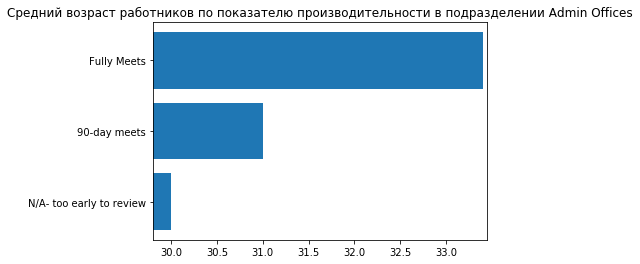

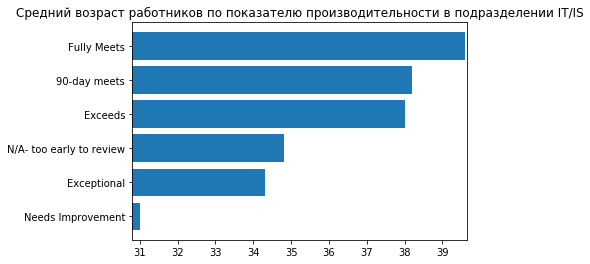

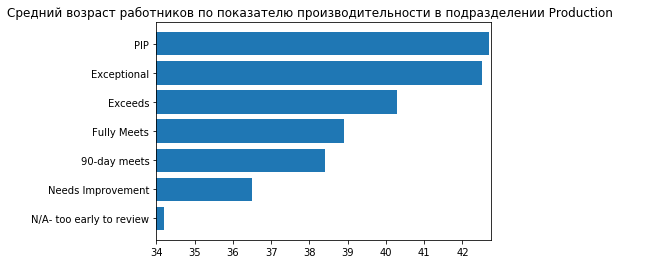

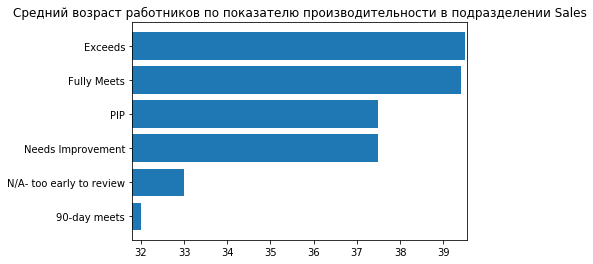

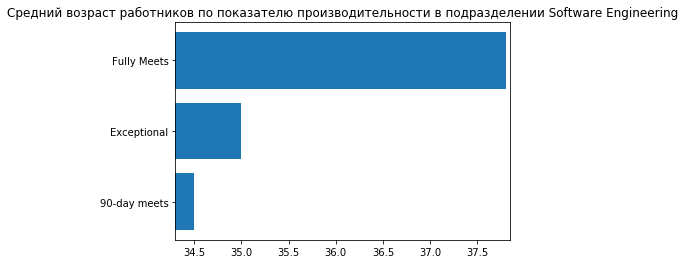

In [309]:
# Построим bar-chart по показателю среднего возраста для каждого департамента
# В цикле нарисуем 15 графиков, для этого созадим на каждом этапе цикла по холсту
for n in range (6):
    if departments[n] == 'Executive Office':
        pass
    else:
        n1 = str(n)
        name_subplot = 'subplot' + n1
        name_fig = 'fig' + n1
        name_fig, name_subplot = plt.subplots()
        name_subplot.barh(df_avg_age_by_dep[df_avg_age_by_dep['department'] == departments[n]]['Performance Score'], 
                      df_avg_age_by_dep[df_avg_age_by_dep['department'] == departments[n]]['avg_age'])
        name_subplot.set_title(
            f'Средний возраст работников по показателю производительности в подразделении {departments[n]}')
        x_min = df_avg_age_by_dep.loc[df_avg_age_by_dep['department'] == departments[n], 'avg_age'].min() - 0.2
        x_max = df_avg_age_by_dep.loc[df_avg_age_by_dep['department'] == departments[n], 'avg_age'].max() + 0.05
        name_subplot.set_xlim(x_min, x_max)

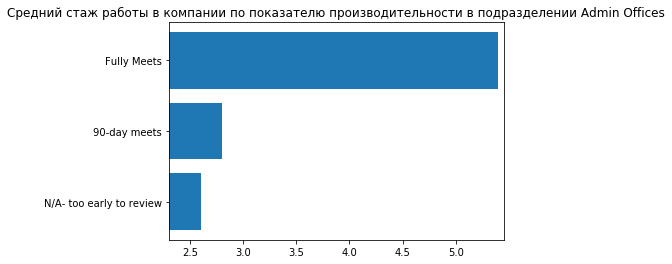

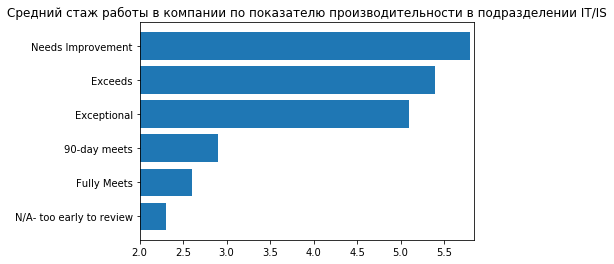

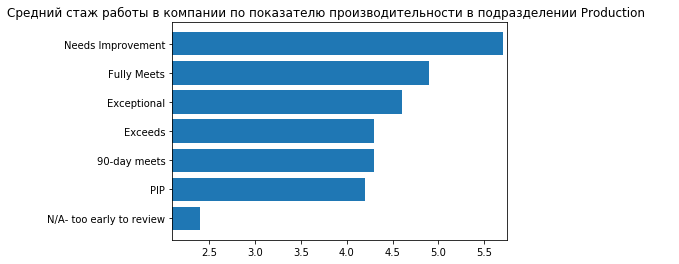

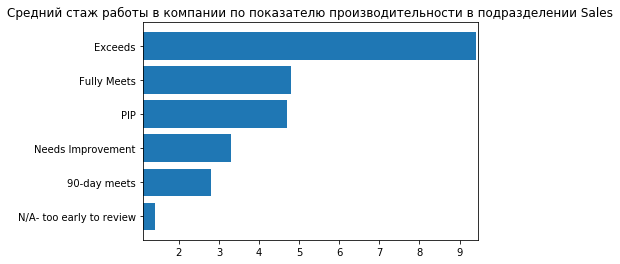

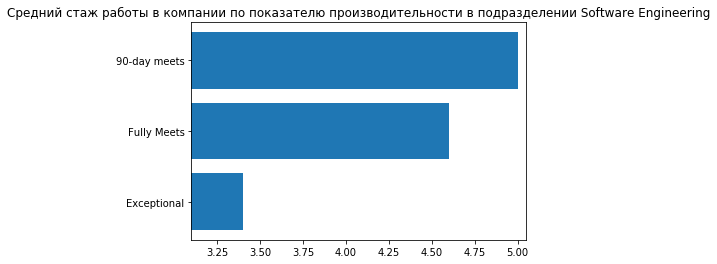

In [311]:
# Построим bar-chart по показателю среднего стажа работы в компании по производительности в каждом подразделении
# В цикле нарисуем 15 графиков, для этого созадим на каждом этапе цикла по холсту
for n in range(6):
    if departments[n] == 'Executive Office':
        pass
    else:
        n1 = str(n)
        name_subplot = 'subplot' + n1
        name_fig = 'fig' + n1
        name_fig, name_subplot = plt.subplots()
        name_subplot.barh(df_avg_age_by_dep[
            df_avg_age_by_dep['department'] == departments[n]].
                          sort_values('avg_experience')['Performance Score'], 
                          df_avg_age_by_dep[df_avg_age_by_dep['department'] == departments[n]].
                          sort_values('avg_experience')['avg_experience'])
        name_subplot.set_title(
            f'Средний стаж работы в компании по показателю производительности в подразделении {departments[n]}')
        #установим минимумы для x:
        x_min = df_avg_age_by_dep.loc[df_avg_age_by_dep['department'] == departments[n], 'avg_experience'].min() - 0.3
        x_max = df_avg_age_by_dep.loc[df_avg_age_by_dep['department'] == departments[n], 'avg_experience'].max() + 0.05
        name_subplot.set_xlim(x_min, x_max)

**Также как и по компании в целом, по всем её подразделениям наблюдается прямая связь между возрастом и производительностью сотрудника. Но в отличии от общей тенденции, выявлено наличие связи между стажем работника и его производительностью по отделу Sales**. Рассмотрим более подробно характер и особенности этих связей по отдельным департаментам:

* **В подразделении IT/IS** четко прослеживается прямая связь между возрастом сотрудника и его показателями производительности. При этом, **выдающиеся результаты (Exeptional) показывают далеко не самые возрастные сотрудники (34,3 лет), тем не менее средний стаж таких работников - более 5 лет. Но в целом, прямой связи между стажем работы и производительностью здесь не наблюдается и, вероятно, высокие показатели данных работников связаны с иными факторами** (уровень образования, квалификаци, профессиональный стаж и др.), которые треуют дополнительного исследования.

* **По подразделению Production**  мы наблюдаем прямую связь между возрастом и производительностью. Тем не менее, стоит отметить, что сотрудники, включенные в план по повышению производительности (PIP) имеют средний возраст 42,7 лет, что является самым высоким показателем для рассматриваемого отдела. То есть именно в этом подразделении **есть проблема с низкой производительностью отдельных более возрастных работников**. Данная ситуация нельзя объяснить меньшим показателем среднего стажа работы в компании таких сотрудников (4,1 лет), поскольку четкой связи между стажем и производительностью по данному отделу не наблюдается.

* **В подразделении Sales имеет место прямая связь, как между возрастом сотрудников и их производительностью, так и между стажем и производительностью**. 

* По подразделению Software Engineering мы видим наличие прямой связи между возрастом сотрудника и его производительность. Влияние стажа работы в компании в этом отделе на производительность не выявлена. 

В связи с выявленными выше особенностями каждого отдельного департамента, можно дать следующие **рекомендации hr-специалистам**:

* **По отделу IT/IS необходимо обратить внимание на относительно молодых сотрудников, которые показывают выдающиеся (Exceptional) результаты и найти причины таких высоких показателей**, поскольку, как выявил анализ, это напрямую не связано ни с возрастом ни со стажем. **Эти причины следует учитывать в процессе отбора кандидатов** на должности в данном департаменте. В остальном же, **при рекрутинге стоит отдавать предпочтение более возрастным, а значит и более опытным работникам**.

*  **По отделу Production стоит обратить внимание на более возрастных сотрудников, попавших в план по увеличению производительности (PIP). Нужно выявить иные причины их отставания по производительности**, и учитывать данную информацию в процессе рекрутинга. В остальном же, при рекрутинге стоит отдавать предпочтение более возрастным, а значит и более опытным работникам**.

* **По подразделению Sales является важным удержание сотрудников с большим стажем работы в компании, поскольку именно они приносят наибольший результат**. При этом, **при отборе кандидатов на новые места следует принимать во внимание возраст**, как показал анализ, более возрастные сотрудники добиваются лучших результатов по производительности.

* **По подразделению Software Engeneering при рекрутинге стоит отдавать предпочтение более возрастным кандидатам, с большим опытом работы**, поскольку они показывают лучшие результаты по производительности.

### Гипотеза 3. Производительность работника зависит от менеджера, под началом которого он работает

In [312]:
#создадим запрос для расчета количества и доли работников с "хорошими" оценками производительности 
#('Exceptional', 'Exceeds', 'Fully Meets', '90-day meets') и с "плохими" оценками ('PIP', 'Needs Improvement')
#для этого используем конструкцию CASE 
sql_str = """
        SELECT "Manager Name" AS manager_name,
        COUNT(*) AS count_all,
        COUNT(CASE 
                WHEN "Performance Score" IN ('Exceptional', 'Exceeds', 'Fully Meets', '90-day meets')
                THEN 1
              END) AS count_good,
        COUNT(CASE 
                WHEN "Performance Score" IN ('PIP', 'Needs Improvement') 
                THEN 1 
              END) AS count_bad,
        ROUND(CAST(COUNT(CASE 
                WHEN "Performance Score" IN ('Exceptional', 'Exceeds', 'Fully Meets', '90-day meets')
                THEN 1
              END) * 100. / COUNT(*) as numeric), 1) AS share_good,
        ROUND(CAST(COUNT(CASE 
                WHEN "Performance Score" IN ('PIP', 'Needs Improvement') 
                THEN 1 
              END) * 100. / COUNT(*) as numeric), 1) AS share_bad
        FROM hr_dataset
        GROUP BY "Manager Name"
        ORDER BY share_good DESC;
"""

cursor.execute(sql_str)

for row in cursor:
    print(row)

('Brian Champaigne', 8, 8, 0, Decimal('100.0'), Decimal('0.0'))
('Board of Directors', 2, 2, 0, Decimal('100.0'), Decimal('0.0'))
('Eric Dougall', 4, 4, 0, Decimal('100.0'), Decimal('0.0'))
('Kelley Spirea', 22, 21, 0, Decimal('95.5'), Decimal('0.0'))
('Janet King', 19, 17, 2, Decimal('89.5'), Decimal('10.5'))
('Alex Sweetwater', 9, 8, 1, Decimal('88.9'), Decimal('11.1'))
('Kissy Sullivan', 22, 19, 2, Decimal('86.4'), Decimal('9.1'))
('Jennifer Zamora', 7, 6, 1, Decimal('85.7'), Decimal('14.3'))
('Ketsia Liebig', 21, 18, 1, Decimal('85.7'), Decimal('4.8'))
('John Smith', 14, 12, 2, Decimal('85.7'), Decimal('14.3'))
('Lynn Daneault', 13, 11, 1, Decimal('84.6'), Decimal('7.7'))
('Elijiah Gray', 22, 18, 1, Decimal('81.8'), Decimal('4.5'))
('David Stanley', 21, 17, 0, Decimal('81.0'), Decimal('0.0'))
('Simon Roup', 17, 13, 0, Decimal('76.5'), Decimal('0.0'))
('Brannon Miller', 21, 16, 5, Decimal('76.2'), Decimal('23.8'))
('Webster Butler', 21, 16, 2, Decimal('76.2'), Decimal('9.5'))
('Bran

In [313]:
#выгрузим данные в датафрейм
df_score_by_manager=pd.read_sql_query(sql_str, conn)
df_score_by_manager

,manager_name,count_all,count_good,count_bad,share_good,share_bad
0,Brian Champaigne,8,8,0,100.0,0.0
1,Board of Directors,2,2,0,100.0,0.0
2,Eric Dougall,4,4,0,100.0,0.0
3,Kelley Spirea,22,21,0,95.5,0.0
4,Janet King,19,17,2,89.5,10.5
5,Alex Sweetwater,9,8,1,88.9,11.1
6,Kissy Sullivan,22,19,2,86.4,9.1
7,Jennifer Zamora,7,6,1,85.7,14.3
8,Ketsia Liebig,21,18,1,85.7,4.8
9,John Smith,14,12,2,85.7,14.3


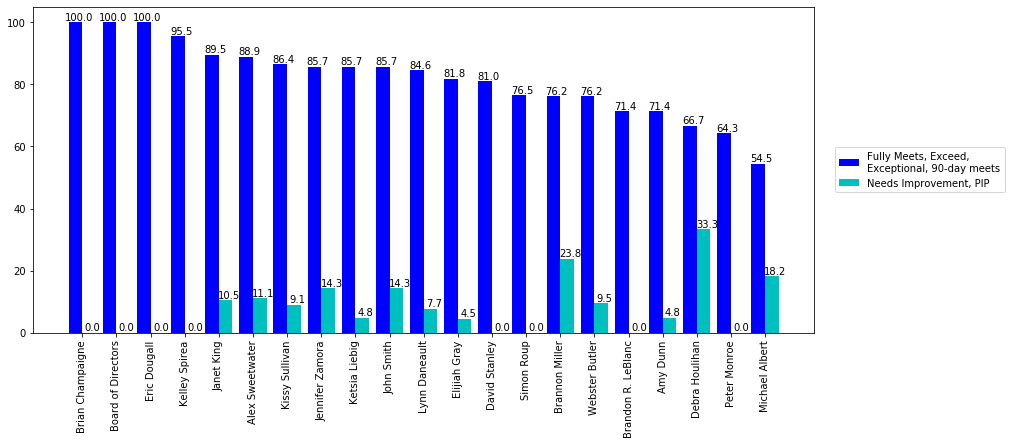

In [319]:
# Нарисуем график, для каждого менеджера строим два бара - доля работников под началом менеджера с "хорошими" оценками и
# с "плохими":

width = 0.4 #задаем переменную с шириной бара 
fig, subplot = plt.subplots(figsize=(14, 6))
managers = df_score_by_manager.manager_name.to_list() #создаем список менеджеров из датафрейма
labels = [] #создаем список для сохранения текста для подписи данных на графике

for manager in managers: #в цикле рисуем по два бара для каждого менеджера

    x1 = managers.index(manager) #координата x равна индексу менеджера в списке
 
    y1 = df_score_by_manager[df_score_by_manager['manager_name'] == manager]['share_good'].values
    #значение y1 равно доле работников с "хорошими" оценками
    subplot.bar(x1 - width/2, y1, color='b', width = width) #рисуем бар с долей работников с "хорошими" оценками
    
    y2 = df_score_by_manager[df_score_by_manager['manager_name'] == manager]['share_bad'].values
    #y2 равен доле работников с "плохими" оценками
    subplot.bar(x1 + width/2, y2, color='c', width = width) #рисуем бар с долей работников с "плохими" оценками
    
    #добавляем y1 и y2 в список:
    labels.append(y1[0]) 
    labels.append(y2[0])

#устанавливаем метки и лейблы для оси х
x_ticks = [i for i in range(0, len(managers))] #генерируем список, соответствующий x1
subplot.set_xticks(x_ticks) #устанвливаем метки оси x
subplot.set_xticklabels(managers, rotation='vertical') #устанавливаем лейблы оси x, соответствующие именам менеджеров

#устанавливаем легенду
plt.legend(['Fully Meets, Exceed, \nExceptional, 90-day meets', 'Needs Improvement, PIP'], 
           loc="center right", bbox_to_anchor=(0.75, 0, 0.5, 1))

#дополнительно создаем подписи данных, на основе созданного списка labels:
rects = subplot.patches

for rect, label in zip(rects, labels):
    height = rect.get_height()
    subplot.text(rect.get_x() + 0.3, height, label,
            ha='center', va='bottom')

Из графика видно, что есть следующие "типы" менеджеров:
* **Brian Champaigne, Board of Directors и Eric Dougall - их сотрудники показывают 100% хорошие результаты** по производительности
* **Kelley Spirea, David  Stanley, Simon Roup, Brandon R. LeBlanc и Peter Monroe - под их началом нет работников, показывающих "плохие" результаты** по производительности, но результат не 100%, так как **часть работников еще не прошла оценку**
* У  остальных менеджеров есть под началом работники с "плохими" показателями производительности. **Самая высокая доля низкоэффективных работников трудится под началом Debra Hooulihan (33.3%), Brannon Miller (23.8%), Michael Albert (18.2%)**.

**HR-отделу рекомендуется проверить работу менеджеров с большой долей низкоэффективных сотрудников**, при необходимости принять меры по обучению/повышению квалификации данных менеджеров.

### Гипотеза 4. Подбор сотрудников с определенных источников рабочей силы более эффективен (такие сотрудники меньше увольняются и показывают более высокую производительность)

*Эффективность подбора в данном случае понимается, как бОльшая конверсия из кандидатов в сотрудники компании, меньшее количество увольнений и более высокая производительность.*

In [424]:
#Посмотрим, с каких источников пришло больше всего сотрудников компании, проведем анализ за последние 3 года, где
#доступны данные по найму и увольнениям (2014-2016 гг.):
sql_str = """
        SELECT "Employee Source" AS employee_source, 
        ROUND(CAST(COUNT(*)* 100. / (SELECT COUNT(*) FROM hr_dataset
        WHERE DATE_PART('year', "Date of Hire") > 2013) as numeric), 1) AS share
        FROM hr_dataset
        WHERE DATE_PART('year', "Date of Hire") > 2013
        GROUP BY "Employee Source"
        ORDER BY share DESC;
"""
cursor.execute(sql_str)

for row in cursor:
    print(row)

('Employee Referral', Decimal('17.2'))
('Professional Society', Decimal('10.3'))
('Vendor Referral', Decimal('9.5'))
('Pay Per Click - Google', Decimal('7.8'))
('Indeed', Decimal('6.9'))
('Monster.com', Decimal('6.9'))
('Website Banner Ads', Decimal('6.0'))
('On-campus Recruiting', Decimal('6.0'))
('Newspager/Magazine', Decimal('5.2'))
('Glassdoor', Decimal('4.3'))
('MBTA ads', Decimal('4.3'))
('Diversity Job Fair', Decimal('3.4'))
('Internet Search', Decimal('2.6'))
('Word of Mouth', Decimal('2.6'))
('Search Engine - Google Bing Yahoo', Decimal('2.6'))
('Billboard', Decimal('1.7'))
('Other', Decimal('0.9'))
('Company Intranet - Partner', Decimal('0.9'))
('Information Session', Decimal('0.9'))


In [425]:
#добавим полученные данные в датафрейм
df_share_employee_source = pd.read_sql_query(sql_str, conn)
df_share_employee_source

,employee_source,share
0,Employee Referral,17.2
1,Professional Society,10.3
2,Vendor Referral,9.5
3,Pay Per Click - Google,7.8
4,Indeed,6.9
5,Monster.com,6.9
6,Website Banner Ads,6.0
7,On-campus Recruiting,6.0
8,Newspager/Magazine,5.2
9,Glassdoor,4.3


In [437]:
#посмотрим с каких источников приходит больше кандидатов, которые впоследствии увольняются (2014-2016 гг.)
sql_str = """
        SELECT "Employee Source" AS employee_source,
        ROUND(CAST(COUNT(*)* 100. / (SELECT COUNT(*) FROM hr_dataset
        WHERE DATE_PART('year', "Date of Termination") > 2013) as numeric), 1) AS share
        FROM hr_dataset
        WHERE DATE_PART('year', "Date of Termination") > 2013
        GROUP BY "Employee Source"
        ORDER BY share DESC;
"""

cursor.execute(sql_str)

for row in cursor:
    print(row)

('Diversity Job Fair', Decimal('16.4'))
('Monster.com', Decimal('14.5'))
('Search Engine - Google Bing Yahoo', Decimal('10.9'))
('Social Networks - Facebook Twitter etc', Decimal('7.3'))
('Employee Referral', Decimal('7.3'))
('Glassdoor', Decimal('7.3'))
('MBTA ads', Decimal('5.5'))
('Vendor Referral', Decimal('5.5'))
('Professional Society', Decimal('5.5'))
('Billboard', Decimal('3.6'))
('Word of Mouth', Decimal('3.6'))
('Other', Decimal('1.8'))
('Newspager/Magazine', Decimal('1.8'))
('Internet Search', Decimal('1.8'))
('Pay Per Click - Google', Decimal('1.8'))
('Company Intranet - Partner', Decimal('1.8'))
('Website Banner Ads', Decimal('1.8'))
('Information Session', Decimal('1.8'))


In [438]:
#доавим данные в датафрейм
df_terms_by_employee_source = pd.read_sql_query(sql_str, conn)
df_terms_by_employee_source

,employee_source,share
0,Diversity Job Fair,16.4
1,Monster.com,14.5
2,Search Engine - Google Bing Yahoo,10.9
3,Social Networks - Facebook Twitter etc,7.3
4,Employee Referral,7.3
5,Glassdoor,7.3
6,MBTA ads,5.5
7,Vendor Referral,5.5
8,Professional Society,5.5
9,Billboard,3.6


Text(0.5, 1.0, 'Доля уволенных работников по источникам кандидатов \nза 2014-2016 гг.')

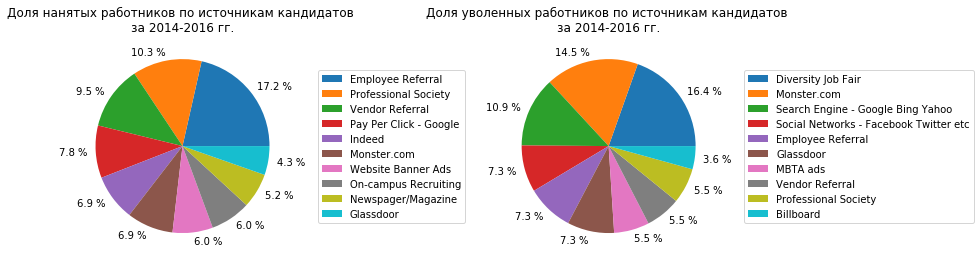

In [439]:
#нарисуем два графика - доля нанятых сотрудников и уволенных по источникам кандидатов:
fig, (subplot_1, subplot_2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(14, 4)
) # создаем холст для двух графиков рядом в две колонки

TOP = 10 #создадим переменную, чтобы использовать 10 самых больших значений из датафрейма

#рисуем первую круговую диаграмму и устанавливаем легенду
wedges_1, text_1 = subplot_1.pie(df_share_employee_source.share[:TOP],
                           explode=None,
                           labels=[f'{share} %' for share in df_share_employee_source.share[:TOP].values])
subplot_1.legend(wedges_1, df_share_employee_source.employee_source[:TOP], 
                 loc='center left', bbox_to_anchor=(1.1, 0, 0.5, 1))
subplot_1.set_title('Доля нанятых работников по источникам кандидатов \nза 2014-2016 гг.')

#рисуем вторую круговую диаграмму и устанавливаем легенду
wedges_2, text_2 = subplot_2.pie(df_terms_by_employee_source.share[:TOP],
                           explode=None,
                           labels=[f'{share} %' for share in df_terms_by_employee_source.share[:TOP].values])
subplot_2.legend(wedges_2, df_terms_by_employee_source.employee_source[:TOP], 
                 loc='center left', bbox_to_anchor=(1.1, 0, 0.5, 1))
subplot_2.set_title('Доля уволенных работников по источникам кандидатов \nза 2014-2016 гг.')

На левой диаграмме показаны 10 ресурсов, с которых приходило больше всего кандидатов за последние 3 года (2012-2016 гг.). На правой - 10 ресурсов, по которым зафиксировано большее число увольнений за тот же период. Сопоставив две диаграммы, мы видим, что **наиболее эффективными источниками кандидатов являются следующие ресурсы: рекомендации работников, профессиональное сообщество, рекомендации поставщиков**, на них приходится 37% всех принятых в штат работников и только 18% всех увольнений.
**Мало эффективными в плане рекрутинга являются такие ресурсы, как "Ярмарка вакансий", Monster.com, поиск Google**, 42% всех увольнений в компании, приходится на сотрудников, пришедших с этих источников.

In [431]:
#посмотрим с каких источников приходит больше кандидатов, которые показывают "хорошую" оценку производительности
sql_str = """
        SELECT COUNT(*) as count        
        FROM hr_dataset
        WHERE DATE_PART('year', "Date of Termination") > 2013
        OR DATE_PART('year', "Date of Termination") IS NULL
        AND "Performance Score" IN ('PIP', 'Needs Improvement')
"""

cursor.execute(sql_str)

for row in cursor:
    print(row)

(67,)


In [432]:
#посмотрим с каких источников приходит больше кандидатов, которые показывают "хорошую" оценку производительности 
#(берем всех неуволенных сотрудников, а также тех, кто был уволен за последние 3 года - 2014-2016 гг.)
sql_str = """
        SELECT "Employee Source" AS employee_source,
        ROUND(CAST(COUNT(CASE WHEN "Performance Score" IN ('Exceptional', 'Exceeds', 'Fully Meets', '90-day meets') 
        THEN 1 END) * 100. / (SELECT COUNT(*)
        FROM hr_dataset
        WHERE DATE_PART('year', "Date of Termination") > 2013
        OR DATE_PART('year', "Date of Termination") IS NULL
        AND "Performance Score" IN ('Exceptional', 'Exceeds', 'Fully Meets', '90-day meets')) as numeric), 1) AS share
        FROM hr_dataset
        WHERE DATE_PART('year', "Date of Termination") > 2013
        OR DATE_PART('year', "Date of Termination") IS NULL
        GROUP BY "Employee Source"
        ORDER BY share DESC
"""

cursor.execute(sql_str)

for row in cursor:
    print(row)

('Employee Referral', Decimal('11.5'))
('Diversity Job Fair', Decimal('7.9'))
('Monster.com', Decimal('7.5'))
('Search Engine - Google Bing Yahoo', Decimal('6.6'))
('Professional Society', Decimal('6.6'))
('MBTA ads', Decimal('6.2'))
('Pay Per Click - Google', Decimal('6.2'))
('Billboard', Decimal('5.3'))
('Newspager/Magazine', Decimal('4.8'))
('Glassdoor', Decimal('4.4'))
('Vendor Referral', Decimal('4.4'))
('On-campus Recruiting', Decimal('4.4'))
('Website Banner Ads', Decimal('4.0'))
('Indeed', Decimal('3.5'))
('Social Networks - Facebook Twitter etc', Decimal('3.1'))
('Other', Decimal('2.6'))
('Word of Mouth', Decimal('2.6'))
('Internet Search', Decimal('1.8'))
('Information Session', Decimal('1.3'))
('Careerbuilder', Decimal('0.4'))
('Company Intranet - Partner', Decimal('0.4'))


In [433]:
#сохраним данные в датафрейме
df_good_perf_score_by_sources = pd.read_sql_query(sql_str, conn)
df_good_perf_score_by_sources

,employee_source,share
0,Employee Referral,11.5
1,Diversity Job Fair,7.9
2,Monster.com,7.5
3,Search Engine - Google Bing Yahoo,6.6
4,Professional Society,6.6
5,MBTA ads,6.2
6,Pay Per Click - Google,6.2
7,Billboard,5.3
8,Newspager/Magazine,4.8
9,Glassdoor,4.4


In [434]:
#посмотрим с каких источников приходит больше кандидатов, которые показывают "плохую" оценку производительности
sql_str = """
        SELECT "Employee Source" employee_source,
        ROUND(CAST(COUNT(CASE WHEN "Performance Score" IN ('PIP', 'Needs Improvement') THEN 1 END) * 100. / (SELECT COUNT(*) 
        FROM hr_dataset WHERE DATE_PART('year', "Date of Termination") > 2013
        OR DATE_PART('year', "Date of Termination") IS NULL
        AND "Performance Score" IN ('PIP', 'Needs Improvement')) as numeric), 1) AS share
        FROM hr_dataset
        WHERE DATE_PART('year', "Date of Termination") > 2013
        OR DATE_PART('year', "Date of Termination") IS NULL
        GROUP BY "Employee Source"
        ORDER BY share DESC;
"""

cursor.execute(sql_str)

for row in cursor:
    print(row)

('Monster.com', Decimal('4.5'))
('Diversity Job Fair', Decimal('4.5'))
('Website Banner Ads', Decimal('3.0'))
('Pay Per Click - Google', Decimal('3.0'))
('MBTA ads', Decimal('3.0'))
('Professional Society', Decimal('3.0'))
('Internet Search', Decimal('1.5'))
('Search Engine - Google Bing Yahoo', Decimal('1.5'))
('Glassdoor', Decimal('1.5'))
('Word of Mouth', Decimal('1.5'))
('Billboard', Decimal('1.5'))
('Careerbuilder', Decimal('0.0'))
('Newspager/Magazine', Decimal('0.0'))
('Other', Decimal('0.0'))
('Company Intranet - Partner', Decimal('0.0'))
('Social Networks - Facebook Twitter etc', Decimal('0.0'))
('Employee Referral', Decimal('0.0'))
('Indeed', Decimal('0.0'))
('Vendor Referral', Decimal('0.0'))
('On-campus Recruiting', Decimal('0.0'))
('Information Session', Decimal('0.0'))


In [435]:
#сохраним данные в датафрейм
df_bad_perf_score_by_sources = pd.read_sql_query(sql_str, conn)
df_bad_perf_score_by_sources

,employee_source,share
0,Monster.com,4.5
1,Diversity Job Fair,4.5
2,Website Banner Ads,3.0
3,Pay Per Click - Google,3.0
4,MBTA ads,3.0
5,Professional Society,3.0
6,Internet Search,1.5
7,Search Engine - Google Bing Yahoo,1.5
8,Glassdoor,1.5
9,Word of Mouth,1.5


Text(0.5, 1.0, 'Доля работников с высокими и низкими показателями производительности \nпо источникам кандидатов за 2014-2016 гг.')

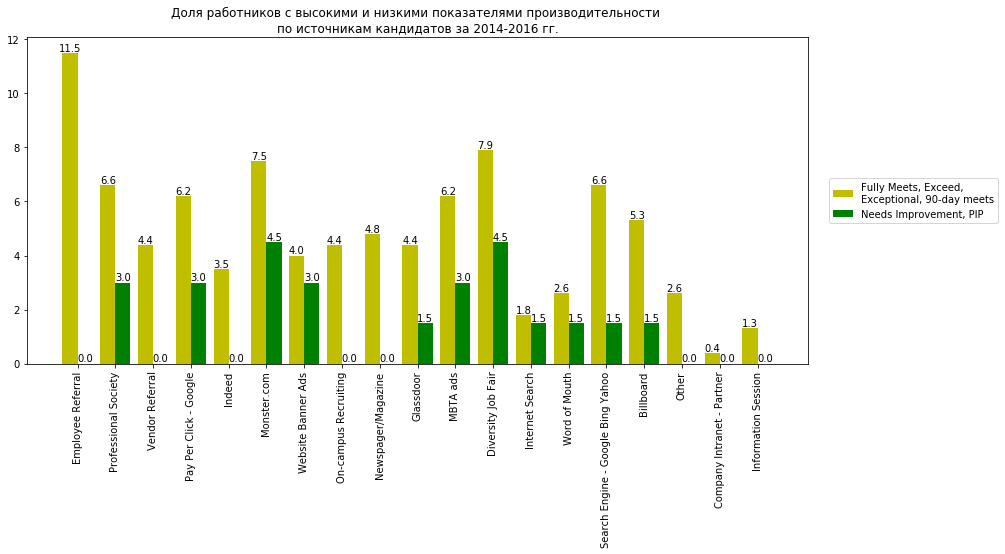

In [436]:
# Нарисуем график:

width = 0.4 #устанавливаем ширину бара
employee_sources = df_share_employee_source['employee_source'].tolist() #создаем список всех источников кандидатов

fig, subplot = plt.subplots(figsize=(14, 6)) 

labels = [] #создаем список с подписями данных

for source in employee_sources: # в цикле нарисуем по два бара для каждого источника кандидатов

    x1 = employee_sources.index(source) # координата х равна индексу источника кандидатов в списке
 
    if df_good_perf_score_by_sources[df_good_perf_score_by_sources['employee_source'] == source].empty:
        #проверяем наличие сотрудников с "хорошими оценками" по каждому источнику
        y1 = 0 #если нет таких, то устанавливаем значение y = 0
        leg_lab_1 = y1 # сохраняем переменную для добавления в список с подписями данных
    else:
        y1 = df_good_perf_score_by_sources[
            df_good_perf_score_by_sources['employee_source'] == source]['share'].values
        #если есть такие сотрудники, то y координата равна доле таких сотрудников
        leg_lab_1 = y1[0] # сохраняем переменную для добавления в список с подписями данных
   
    subplot.bar(x1 - width/2, y1, color='y', width = width) # рисуем график со смещением х на половину ширины бара
    
    #делаем все то же самое для "плохих" оценок производительности:
    
    if df_bad_perf_score_by_sources[df_bad_perf_score_by_sources['employee_source'] == source].empty:
        y2 = 0
        leg_lab_2 = y2
    else:
        y2 = df_bad_perf_score_by_sources[
            df_bad_perf_score_by_sources['employee_source'] == source]['share'].values
        leg_lab_2 = y2[0]
   
    subplot.bar(x1 + width/2, y2, color='g', width = width)
    
    labels.append(leg_lab_1) #добавляем значения для подписи данных в список
    labels.append(leg_lab_2)


subplot.set_xticks([i for i in range(0, len(employee_sources))]) #устанавливаем метки оси х
subplot.set_xticklabels(employee_sources, rotation='vertical') # устанавливаем лейблы оси х

plt.legend(['Fully Meets, Exceed, \nExceptional, 90-day meets', 'Needs Improvement, PIP'], 
           loc="center right", bbox_to_anchor=(0.75, 0, 0.5, 1)) #добавляем легенду

#дополнительно создадим подписи данных
rects = subplot.patches

for rect, label in zip(rects, labels):
    height = rect.get_height()
    subplot.text(rect.get_x() + 0.2, height, label,
            ha='center', va='bottom')
    
subplot.set_title(
    'Доля работников с высокими и низкими показателями производительности \nпо источникам кандидатов за 2014-2016 гг.')

#### Выводы:

1. Как видно из диаграммы, **наиболее эффективными источниками человеческих ресурсов для компании являются рекомендации работников и рекомендации поставщиков**. Они входят в ТОП-3 по найму (см. выше) и показывают высокую долю работников с хорошими результатами по производительности (17.3%). При этом нет сотрудников с плохими результатами.
2. **Посредством Профессионального сообщества и рекламы Google(Pay Per Click - Google) также набирают внушительную долю сотрудников в штат** (18.1%), **но высокая доля работников, показывающих плохие результаты по производительности (6%), делает эти ресурсы менее эффективными**.
3. **Перспективными ресурсами по привлечению кадров являются Indeed, Newspager/Magazine и On-campus recruting** - 3.5, 4.8 и 4.4% работников соответственно, показывают хорошую производительность, и среди них нет сотрудников, нуждающихся в переподготовке или включенных в план по переподготовке. Сейчас с этих источников поступает меньше кадров, чем из ТОП-3, но **такие сотрудники работают эффективнее**.

#### Рекомендации для hr-отдела:

**При формировании бюджета на рекрутинг учитывать те ресурсы, с которых приходит больше кандидатов, которые впоследствии становятся сотрудниками компании** (ТОП-10 ресурсов)

Среди ТОП-10 ресурсов рекомендуется: 

1. **в большей степени использовать следующие источники для привлечения кадров: рекомендации работников, рекомендации поставщиков, Indeed, Newspager/Magazine, On-campus recruting**. С этих источников приходит больше всего качественных кадров - меньше увольнений и больше эффективность.
2. **пересмотреть масштаб использования таких источников, как Professional Society, поиск Google и Website Banner Ads**. Эффективность кадров с этих ресурсов меньше вследствие низких показателей по производительности.
3.  **минимизировать использование ресурса Monster.com** в связи с высокой долей увольнений, и значительной долей работников с низкими показателями производительности 

## Часть вторая

Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox.
Объектом анализа является паблик Skillbox Вконтакте.

Подключитесь к API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа.

Дополнительные инструкции по работе с API VK расположены здесь.